In [1]:
import pandas as pd
pgCollege = pd.read_csv("NBA_College.csv")
pgCollege.head()

Rk                   Player Pos  Age   Tm   G    MP   PER  CAST   CTO  ...  \
0   1             Nikola Jokić   C   28  DEN  70  2415  31.0   NaN   NaN  ...   
1   2    Giannis Antetokounmpo  PF   29  MIL  68  2394  29.8   NaN   NaN  ...   
2   3  Shai Gilgeous-Alexander  PG   25  OKC  70  2409  29.7  28.8  19.8  ...   
3   4              Luka Dončić  PG   24  DAL  63  2356  28.2   NaN   NaN  ...   
4   5            Anthony Davis   C   30  LAL  68  2438  25.7   NaN   NaN  ...   

   Unnamed: 25   OWS  DWS    WS  WS/48  Unnamed: 30  OBPM  DBPM   BPM  VORP  
0          NaN  10.7  4.3  15.0  0.298          NaN   9.1   4.2  13.3   9.4  
1          NaN   9.0  3.4  12.4  0.249          NaN   6.7   2.3   9.0   6.6  
2          NaN  10.1  4.0  14.1  0.281          NaN   6.8   2.4   9.2   6.8  
3          NaN   7.7  3.0  10.7  0.218          NaN   8.3   1.6   9.8   7.1  
4          NaN   6.4  4.1  10.5  0.207          NaN   3.4   1.7   5.1   4.4  

[5 rows x 35 columns]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
pgCollege = pd.read_csv("NBA_College.csv")

# Filter data for Point Guards and handle possible division by zero or nulls
pgCollege = pgCollege[pgCollege['Pos'] == 'PG']
pgCollege['CAST_CTO'] = pgCollege['CAST'] / pgCollege['CTO']
pgCollege.dropna(subset=['PER', 'CAST_CTO'], inplace=True)  # Ensure no NaN values

# Prepare data for regression model
X = sm.add_constant(pgCollege['CAST_CTO'])  # adding a constant
y = pgCollege['PER']

# Fit regression model
model = sm.OLS(y, X).fit()

# Calculate R-squared
r_squared = model.rsquared

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pgCollege['PER'], pgCollege['CAST_CTO'], color='blue', alpha=0.7)
plt.title('NBA PER vs CAST/CTO Ratio for Point Guards')
plt.xlabel('NBA PER')
plt.ylabel('CAST/CTO')
plt.grid(True)
plt.show()


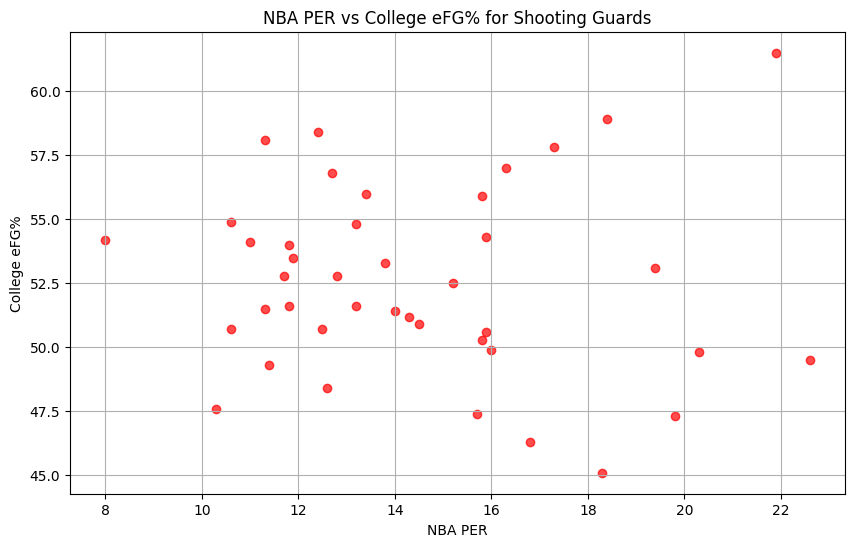

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
sgCollege = pd.read_csv("NBA_College.csv")

# Filter data for Shooting Guards
sgCollege = sgCollege[sgCollege['Pos'] == 'SG']
sgCollege.dropna(subset=['PER', 'CeFG%'], inplace=True)  # Ensure no NaN values

# Prepare data for regression model
X = sm.add_constant(sgCollege['CeFG%'])  # adding a constant
y = sgCollege['PER']

# Fit regression model
model = sm.OLS(y, X).fit()

# Calculate R-squared
r_squared = model.rsquared

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(sgCollege['PER'], sgCollege['CeFG%'], color='red', alpha=0.7)
plt.title('NBA PER vs College eFG% for Shooting Guards')
plt.xlabel('NBA PER')
plt.ylabel('College eFG%')
plt.grid(True)
plt.show()


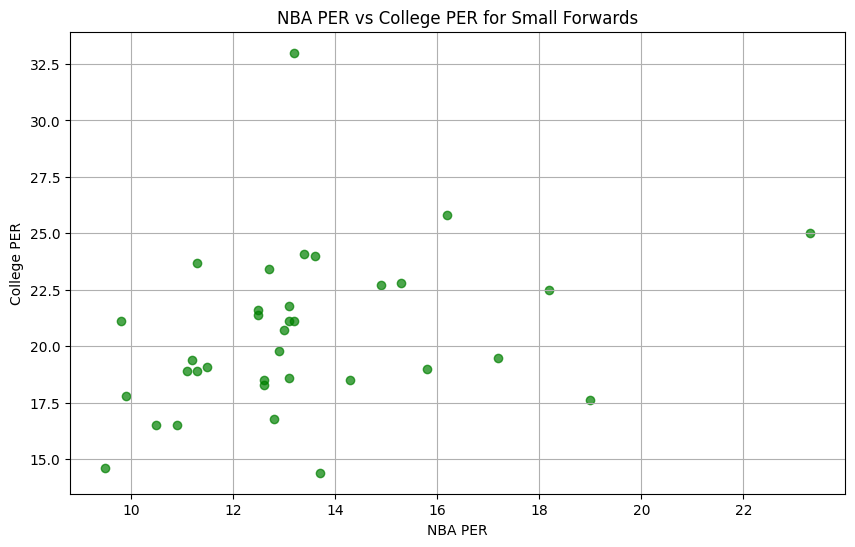

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
sfCollege = pd.read_csv("NBA_College.csv")

# Filter data for Small Forwards
sfCollege = sfCollege[sfCollege['Pos'] == 'SF']
sfCollege.dropna(subset=['PER', 'CPER'], inplace=True)  # Ensure no NaN values

# Prepare data for regression model
X = sm.add_constant(sfCollege['CPER'])  # adding a constant
y = sfCollege['PER']

# Fit regression model
model = sm.OLS(y, X).fit()

# Calculate R-squared
r_squared = model.rsquared

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(sfCollege['PER'], sfCollege['CPER'], color='green', alpha=0.7)
plt.title('NBA PER vs College PER for Small Forwards')
plt.xlabel('NBA PER')
plt.ylabel('College PER')
plt.grid(True)
plt.show()


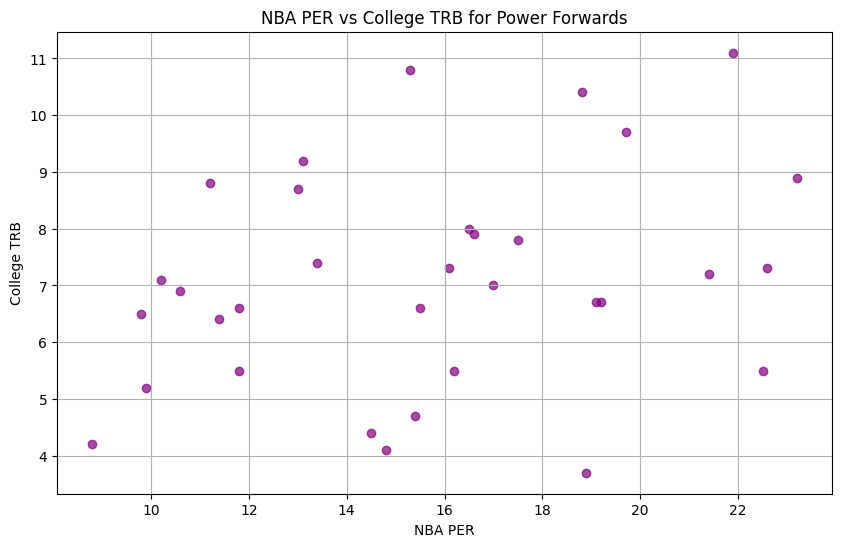

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
pfCollege = pd.read_csv("NBA_College.csv")

# Filter data for Power Forwards
pfCollege = pfCollege[pfCollege['Pos'] == 'PF']

# Ensure there are no missing values
pfCollege.dropna(subset=['PER', 'CTRB', 'CFG%'], inplace=True)

# Analysis for College TRB
X_trb = sm.add_constant(pfCollege['CTRB'])  # adding a constant
y_trb = pfCollege['PER']
model_trb = sm.OLS(y_trb, X_trb).fit()
r_squared_trb = model_trb.rsquared

# Plot for College TRB
plt.figure(figsize=(10, 6))
plt.scatter(pfCollege['PER'], pfCollege['CTRB'], color='purple', alpha=0.7)
plt.title(f'NBA PER vs College TRB for Power Forwards')
plt.xlabel('NBA PER')
plt.ylabel('College TRB')
plt.grid(True)
plt.show()

# Analysis for College FG%
X_cfg = sm.add_constant(pfCollege['CFG%'])  # adding a constant
y_cfg = pfCollege['PER']
model_cfg = sm.OLS(y_cfg, X_cfg).fit()
r_squared_cfg = model_cfg.rsquared

# Plot for College FG%
plt.figure(figsize=(10, 6))
plt.scatter(pfCollege['PER'], pfCollege['CFG%'], color='magenta', alpha=0.7)
plt.title(f'NBA PER vs College FG% for Power Forwards')
plt.xlabel('NBA PER')
plt.ylabel('College FG%')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np  # Importing numpy for correlation calculation

# Load the dataset
cCollege = pd.read_csv("NBA_College.csv")

# Filter data for Centers
cCollege = cCollege[cCollege['Pos'] == 'C']

# Ensure there are no missing values
cCollege.dropna(subset=['PER', 'CFG%'], inplace=True)

# Calculate Pearson correlation coefficient
pearson_corr = cCollege['PER'].corr(cCollege['CFG%'])

# Analysis for College FG%
X = sm.add_constant(cCollege['CFG%'])  # adding a constant
y = cCollege['PER']
model = sm.OLS(y, X).fit()
r_squared = model.rsquared

# Plot for College FG%
plt.figure(figsize=(10, 6))
plt.scatter(cCollege['PER'], cCollege['CFG%'], color='orange', alpha=0.7)
plt.title(f'NBA PER vs College FG% for Centers')
plt.xlabel('NBA PER')
plt.ylabel('College FG%')
plt.grid(True)
plt.show()

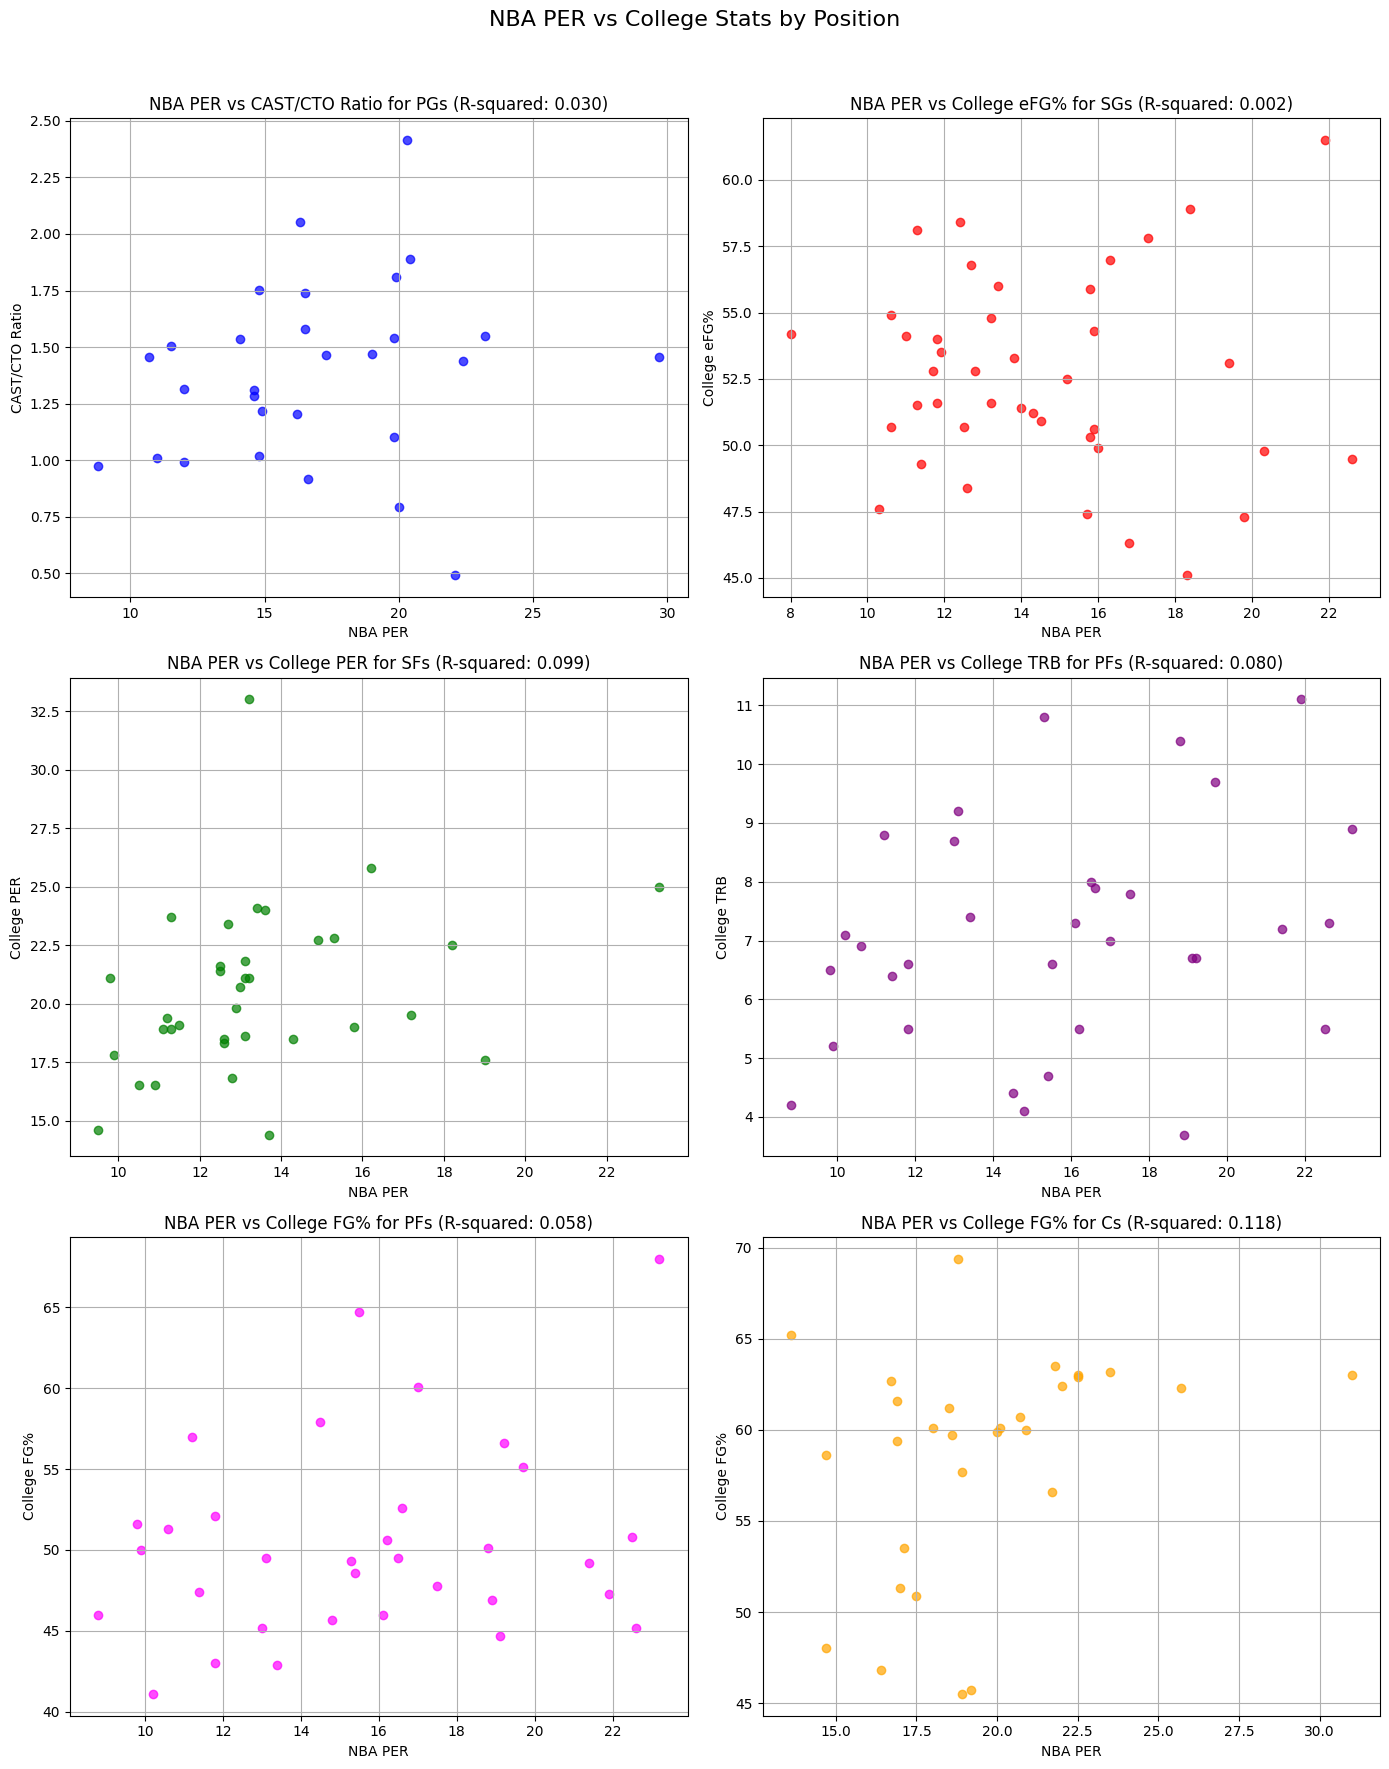

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("NBA_College.csv")

# Filter data by position
pg_data = data[data['Pos'] == 'PG'].dropna(subset=['PER', 'CAST', 'CTO'])
sg_data = data[data['Pos'] == 'SG'].dropna(subset=['PER', 'CeFG%'])
sf_data = data[data['Pos'] == 'SF'].dropna(subset=['PER', 'CPER'])
pf_data = data[data['Pos'] == 'PF'].dropna(subset=['PER', 'CTRB', 'CFG%'])
c_data = data[data['Pos'] == 'C'].dropna(subset=['PER', 'CFG%'])

# Function to perform regression and return R-squared
def calculate_r_squared(x, y):
    X = sm.add_constant(x)  # adding a constant
    model = sm.OLS(y, X).fit()
    return model.rsquared

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
fig.suptitle('NBA PER vs College Stats by Position', fontsize=16)

# PG - AST/TO Ratio
r_squared_pg = calculate_r_squared(pg_data['CAST'] / pg_data['CTO'], pg_data['PER'])
axes[0, 0].scatter(pg_data['PER'], pg_data['CAST'] / pg_data['CTO'], color='blue', alpha=0.7)
axes[0, 0].set_title(f'NBA PER vs CAST/CTO Ratio for PGs (R-squared: {r_squared_pg:.3f})')
axes[0, 0].set_xlabel('NBA PER')
axes[0, 0].set_ylabel('CAST/CTO Ratio')
axes[0, 0].grid(True)

# SG - eFG%
r_squared_sg = calculate_r_squared(sg_data['CeFG%'], sg_data['PER'])
axes[0, 1].scatter(sg_data['PER'], sg_data['CeFG%'], color='red', alpha=0.7)
axes[0, 1].set_title(f'NBA PER vs College eFG% for SGs (R-squared: {r_squared_sg:.3f})')
axes[0, 1].set_xlabel('NBA PER')
axes[0, 1].set_ylabel('College eFG%')
axes[0, 1].grid(True)

# SF - PER
r_squared_sf = calculate_r_squared(sf_data['CPER'], sf_data['PER'])
axes[1, 0].scatter(sf_data['PER'], sf_data['CPER'], color='green', alpha=0.7)
axes[1, 0].set_title(f'NBA PER vs College PER for SFs (R-squared: {r_squared_sf:.3f})')
axes[1, 0].set_xlabel('NBA PER')
axes[1, 0].set_ylabel('College PER')
axes[1, 0].grid(True)

# PF-TRB
r_squared_pf_trb = calculate_r_squared(pf_data['CTRB'], pf_data['PER'])
axes[1, 1].scatter(pf_data['PER'], pf_data['CTRB'], color='purple', alpha=0.7)
axes[1, 1].set_title(f'NBA PER vs College TRB for PFs (R-squared: {r_squared_pf_trb:.3f})')
axes[1, 1].set_xlabel('NBA PER')
axes[1, 1].set_ylabel('College TRB')
axes[1, 1].grid(True)

# PF - FG%
r_squared_pf_fg = calculate_r_squared(pf_data['CFG%'], pf_data['PER'])
axes[2, 0].scatter(pf_data['PER'], pf_data['CFG%'], color='magenta', alpha=0.7)
axes[2, 0].set_title(f'NBA PER vs College FG% for PFs (R-squared: {r_squared_pf_fg:.3f})')
axes[2, 0].set_xlabel('NBA PER')
axes[2, 0].set_ylabel('College FG%')
axes[2, 0].grid(True)

# C - FG%
r_squared_c = calculate_r_squared(c_data['CFG%'], c_data['PER'])
axes[2, 1].scatter(c_data['PER'], c_data['CFG%'], color='orange', alpha=0.7)
axes[2, 1].set_title(f'NBA PER vs College FG% for Cs (R-squared: {r_squared_c:.3f})')
axes[2, 1].set_xlabel('NBA PER')
axes[2, 1].set_ylabel('College FG%')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()